# Data

Importing all the libraries required

In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

 performing the necessary corpus using Natural language toolkit(NLTK)

In [ ]:

from nltk import sent_tokenize
from nltk import word_tokenize


import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

Implementing csv file to read the data and display the data in tabular form 

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_original=data.copy()
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


categorize the data type and return the column labels

In [ ]:
data.dtypes
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

Reset the index of a dataframe

In [ ]:
data.reset_index(drop = True).head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Delete the unnecessary columns

In [ ]:
data = data.drop(columns=['id'], axis=0)
print(data.head())

   label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation


Clean the data

In [ ]:
data.isna().sum()

label    0
tweet    0
dtype: int64

Read the data and convert the data into string data type

In [ ]:
text = pd.Series(data.tweet.head(50)).to_string()

print(text)

print(len(text))


0      @user when a father is dysfunctional and is s...
1     @user @user thanks for #lyft credit i can't us...
2                                   bihday your majesty
3     #model   i love u take with u all the time in ...
4                factsguide: society now    #motivation
5     [2/2] huge fan fare and big talking before the...
6      @user camping tomorrow @user @user @user @use...
7     the next school year is the year for exams.ð...
8     we won!!! love the land!!! #allin #cavs #champ...
9      @user @user welcome here !  i'm   it's so #gr...
10     â #ireland consumer price index (mom) climb...
11    we are so selfish. #orlando #standwithorlando ...
12    i get to see my daddy today!!   #80days #getti...
13    @user #cnn calls #michigan middle school 'buil...
14    no comment!  in #australia   #opkillingbay #se...
15    ouch...junior is angryð#got7 #junior #yugyo...
16    i am thankful for having a paner. #thankful #p...
17                               retweet if you 

# Tokenization

Tokenize the text by sentences

In [ ]:
from nltk.tokenize import RegexpTokenizer
tk = RegexpTokenizer('\s+', gaps = True)
geek = tk.tokenize(text)
    
print(geek)

['0', '@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 's...', '1', '@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'us...', '2', 'bihday', 'your', 'majesty', '3', '#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', '...', '4', 'factsguide:', 'society', 'now', '#motivation', '5', '[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'the...', '6', '@user', 'camping', 'tomorrow', '@user', '@user', '@user', '@use...', '7', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'exams.ð\x9f\x98...', '8', 'we', 'won!!!', 'love', 'the', 'land!!!', '#allin', '#cavs', '#champ...', '9', '@user', '@user', 'welcome', 'here', '!', "i'm", "it's", 'so', '#gr...', '10', 'â\x86\x9d', '#ireland', 'consumer', 'price', 'index', '(mom)', 'climb...', '11', 'we', 'are', 'so', 'selfish.', '#orlando', '#standwithorlando', '...', '12', 'i', 'get', 'to', 'see', 'my', 'daddy', 'today!!', '#80days', '#getti...', '13', '@user', '#c

In [ ]:
sentences=sent_tokenize(text)
print(sentences)

["0      @user when a father is dysfunctional and is s...\n1     @user @user thanks for #lyft credit i can't us...\n2                                   bihday your majesty\n3     #model   i love u take with u all the time in ...\n4                factsguide: society now    #motivation\n5     [2/2] huge fan fare and big talking before the...\n6      @user camping tomorrow @user @user @user @use...\n7     the next school year is the year for exams.ð\x9f\x98...\n8     we won!!!", 'love the land!!!', '#allin #cavs #champ...\n9      @user @user welcome here !', "i'm   it's so #gr...\n10     â\x86\x9d #ireland consumer price index (mom) climb...\n11    we are so selfish.", '#orlando #standwithorlando ...\n12    i get to see my daddy today!!', "#80days #getti...\n13    @user #cnn calls #michigan middle school 'buil...\n14    no comment!", 'in #australia   #opkillingbay #se...\n15    ouch...junior is angryð\x9f\x98\x90#got7 #junior #yugyo...\n16    i am thankful for having a paner.', '#thankfu

Tokenize the text by words

In [ ]:
words=word_tokenize(text)
print(words)

['0', '@', 'user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 's', '...', '1', '@', 'user', '@', 'user', 'thanks', 'for', '#', 'lyft', 'credit', 'i', 'ca', "n't", 'us', '...', '2', 'bihday', 'your', 'majesty', '3', '#', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', '...', '4', 'factsguide', ':', 'society', 'now', '#', 'motivation', '5', '[', '2/2', ']', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'the', '...', '6', '@', 'user', 'camping', 'tomorrow', '@', 'user', '@', 'user', '@', 'user', '@', 'use', '...', '7', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'exams.ð\x9f\x98', '...', '8', 'we', 'won', '!', '!', '!', 'love', 'the', 'land', '!', '!', '!', '#', 'allin', '#', 'cavs', '#', 'champ', '...', '9', '@', 'user', '@', 'user', 'welcome', 'here', '!', 'i', "'m", 'it', "'s", 'so', '#', 'gr', '...', '10', 'â\x86\x9d', '#', 'ireland', 'consumer', 'price', 'index', '(', 'mom', ')', 'climb', '...', '11', 'we', 'are

Split the text and print the mostly occured words in the text

In [ ]:
from collections import Counter
split_it =text.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)
  
print(most_occur)

[('@user', 18), ('the', 12), ('a', 10), ('i', 9), ('is', 8), ('for', 7), ('to', 7), ('all', 5), ('in', 5), ('...', 5)]


plot the graph with FreqDist

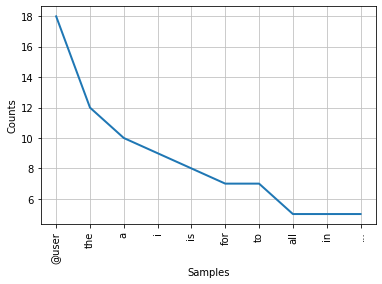

In [ ]:
from nltk.probability import FreqDist
fdist=FreqDist(split_it)
fdist.plot(10)

Remove the special characters and convert the string into lower case and print the length of the text

In [ ]:
num = []
for ele in words:
    if ele.isalpha():
        num.append(ele.lower())
print(num) 
print(len(num))       

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 's', 'user', 'user', 'thanks', 'for', 'lyft', 'credit', 'i', 'ca', 'us', 'bihday', 'your', 'majesty', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'factsguide', 'society', 'now', 'motivation', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'the', 'user', 'camping', 'tomorrow', 'user', 'user', 'user', 'use', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'we', 'won', 'love', 'the', 'land', 'allin', 'cavs', 'champ', 'user', 'user', 'welcome', 'here', 'i', 'it', 'so', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climb', 'we', 'are', 'so', 'selfish', 'orlando', 'standwithorlando', 'i', 'get', 'to', 'see', 'my', 'daddy', 'today', 'getti', 'user', 'cnn', 'calls', 'michigan', 'middle', 'school', 'no', 'comment', 'in', 'australia', 'opkillingbay', 'se', 'ouch', 'junior', 'is', 'junior', 'yugyo', 'i', 'am', 'thankful', 'for', 'having', 'a', 'paner', 'thankful', '

Check the list of stopwords 

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Remove the unnecessary words in the data

In [ ]:
stop_words1=['users']
stop_words=list(set(stop_words).union(stop_words1))


Create an empty set to store the clean text

In [ ]:
clean_text_1= []

for n in num:
    if n not in stop_words:
        clean_text_1.append(n)

print(type(clean_text_1))        
print(clean_text_1)
print("\n")
print(len(clean_text_1))
def clean_text(text):
  text = text.lower()
  text = RegexpTokenizer('\w+').tokenize(text)
  text = [w for w in text if w not in stop_words]
  text = [w for w in text if len(w)>1]
  return text

<class 'list'>
['user', 'father', 'dysfunctional', 'user', 'user', 'thanks', 'lyft', 'credit', 'ca', 'us', 'bihday', 'majesty', 'model', 'love', 'u', 'take', 'u', 'time', 'factsguide', 'society', 'motivation', 'huge', 'fan', 'fare', 'big', 'talking', 'user', 'camping', 'tomorrow', 'user', 'user', 'user', 'use', 'next', 'school', 'year', 'year', 'love', 'land', 'allin', 'cavs', 'champ', 'user', 'user', 'welcome', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climb', 'selfish', 'orlando', 'standwithorlando', 'get', 'see', 'daddy', 'today', 'getti', 'user', 'cnn', 'calls', 'michigan', 'middle', 'school', 'comment', 'australia', 'opkillingbay', 'se', 'ouch', 'junior', 'junior', 'yugyo', 'thankful', 'paner', 'thankful', 'p', 'retweet', 'agree', 'friday', 'smiles', 'around', 'via', 'ig', 'use', 'know', 'essential', 'oils', 'made', 'people', 'blaming', 'ha', 'conceded', 'goal', 'sad', 'little', 'badday', 'coneofshame', 'cats', 'product', 'day', 'happy', 'man', 'wine', 'tool', 'user',

Remove the twitter handles and clean the data

In [ ]:
data['clean_words_1']=data.tweet.apply(clean_text)
data.head()

,label,tweet,clean_words_1
0,0,@user when a father is dysfunctional and is s...,"[user, father, dysfunctional, selfish, drags, ..."
1,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, lyft, credit, use, cause,..."
2,0,bihday your majesty,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,"[model, love, take, time, urð]"
4,0,factsguide: society now #motivation,"[factsguide, society, motivation]"


#stemming

Import the stemming libraries and list the data set

In [ ]:
from nltk.stem import PorterStemmer
print(clean_text_1)
port= PorterStemmer()
list_word = clean_text_1

for n in list_word:
    print(port.stem(n))

['user', 'father', 'dysfunctional', 'user', 'user', 'thanks', 'lyft', 'credit', 'ca', 'us', 'bihday', 'majesty', 'model', 'love', 'u', 'take', 'u', 'time', 'factsguide', 'society', 'motivation', 'huge', 'fan', 'fare', 'big', 'talking', 'user', 'camping', 'tomorrow', 'user', 'user', 'user', 'use', 'next', 'school', 'year', 'year', 'love', 'land', 'allin', 'cavs', 'champ', 'user', 'user', 'welcome', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climb', 'selfish', 'orlando', 'standwithorlando', 'get', 'see', 'daddy', 'today', 'getti', 'user', 'cnn', 'calls', 'michigan', 'middle', 'school', 'comment', 'australia', 'opkillingbay', 'se', 'ouch', 'junior', 'junior', 'yugyo', 'thankful', 'paner', 'thankful', 'p', 'retweet', 'agree', 'friday', 'smiles', 'around', 'via', 'ig', 'use', 'know', 'essential', 'oils', 'made', 'people', 'blaming', 'ha', 'conceded', 'goal', 'sad', 'little', 'badday', 'coneofshame', 'cats', 'product', 'day', 'happy', 'man', 'wine', 'tool', 'user', 'user', 'lumpy

Stem the words and print the supported languages

In [ ]:
from nltk.stem import SnowballStemmer

snow = SnowballStemmer("english")
list_word = clean_text_1

for n in list_word:
    print(snow.stem(n))
print('\n')
SnowballStemmer.languages

user
father
dysfunct
user
user
thank
lyft
credit
ca
us
bihday
majesti
model
love
u
take
u
time
factsguid
societi
motiv
huge
fan
fare
big
talk
user
camp
tomorrow
user
user
user
use
next
school
year
year
love
land
allin
cav
champ
user
user
welcom
gr
ireland
consum
price
index
mom
climb
selfish
orlando
standwithorlando
get
see
daddi
today
getti
user
cnn
call
michigan
middl
school
comment
australia
opkillingbay
se
ouch
junior
junior
yugyo
thank
paner
thank
p
retweet
agre
friday
smile
around
via
ig
use
know
essenti
oil
made
peopl
blame
ha
conced
goal
sad
littl
badday
coneofsham
cat
product
day
happi
man
wine
tool
user
user
lumpi
say
prove
lumpi
user
tgif
ff
gamedev
indiedev
beauti
sign
vendor
upsi
user
smile
media
great
panel
mediat
happi
father
day
user
peopl
went
nightclub
good
nig
never
chanc
vote
presid
alohafriday
time
exist
positiv
user
rip
fellow
nohern
ireland
fan
wh
hard
monday
due
cloudi
weather
di
unbeliev
centuri
bull
domin
travelingram
dalat
ripinkylif
user
one
word
tell
p
oh
c

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

#Lemmatization

Reciprocate the actual word of the language using lemmatization

In [ ]:
from nltk import WordNetLemmatizer
l = WordNetLemmatizer()
list_word = clean_text_1
for n in list_word:
    print(l.lemmatize(n ,pos="v"))

user
father
dysfunctional
user
user
thank
lyft
credit
ca
us
bihday
majesty
model
love
u
take
u
time
factsguide
society
motivation
huge
fan
fare
big
talk
user
camp
tomorrow
user
user
user
use
next
school
year
year
love
land
allin
cavs
champ
user
user
welcome
gr
ireland
consumer
price
index
mom
climb
selfish
orlando
standwithorlando
get
see
daddy
today
getti
user
cnn
call
michigan
middle
school
comment
australia
opkillingbay
se
ouch
junior
junior
yugyo
thankful
paner
thankful
p
retweet
agree
friday
smile
around
via
ig
use
know
essential
oil
make
people
blame
ha
concede
goal
sad
little
badday
coneofshame
cat
product
day
happy
man
wine
tool
user
user
lumpy
say
prove
lumpy
user
tgif
ff
gamedev
indiedev
beautiful
sign
vendor
upsi
user
smile
media
great
panel
mediatization
happy
father
day
user
people
go
nightclub
good
nig
never
chance
vote
presid
alohafriday
time
exist
positiv
user
rip
fellow
nohern
ireland
fan
wh
hard
monday
due
cloudy
weather
di
unbelievable
century
bull
dominate
traveling

#Bag of words

Create an object and feature the model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_v = CountVectorizer()
BW= c_v.fit_transform(sentences).toarray()
print(c_v.vocabulary_)
print("\n")
print(c_v.get_feature_names_out())
print("\n")
print(BW)

{'user': 247, 'when': 260, 'father': 112, 'is': 150, 'dysfunctional': 101, 'and': 54, 'thanks': 232, 'for': 119, 'lyft': 163, 'credit': 92, 'can': 78, 'us': 245, 'bihday': 68, 'your': 272, 'majesty': 165, 'model': 171, 'love': 160, 'take': 226, 'with': 265, 'all': 49, 'the': 234, 'time': 236, 'in': 146, 'factsguide': 109, 'society': 222, 'now': 186, 'motivation': 176, 'huge': 140, 'fan': 110, 'fare': 111, 'big': 66, 'talking': 227, 'before': 63, 'camping': 77, 'tomorrow': 239, 'use': 246, 'next': 180, 'school': 213, 'year': 270, 'exams': 107, 'we': 255, 'won': 266, 'land': 157, 'allin': 50, 'cavs': 80, 'champ': 83, 'welcome': 257, 'here': 138, 'it': 151, 'so': 220, 'gr': 129, '10': 1, 'ireland': 149, 'consumer': 91, 'price': 204, 'index': 147, 'mom': 172, 'climb': 85, '11': 2, 'are': 56, 'selfish': 216, 'orlando': 195, 'standwithorlando': 224, '12': 3, 'get': 123, 'to': 237, 'see': 215, 'my': 177, 'daddy': 93, 'today': 238, '80days': 44, 'getti': 124, '13': 4, 'cnn': 87, 'calls': 76, '

Display the cleaned words and string 

In [ ]:
def clean_text_string(text):
  text=" ".join(text)
  return text

data['clean_string']=data.clean_words_1.apply(clean_text_string) 
#data=data.drop(columns=['user father dysfunctional user user thanks lyft credit ca us bihday majesty model love u take u time factsguide society motivation huge fan fare big talking user camping tomorrow user user user use next school year year love land allin cavs champ user user welcome gr ireland consumer price index mom climb selfish orlando standwithorlando get see daddy today getti user cnn calls michigan middle school comment australia opkillingbay se ouch junior junior yugyo thankful paner thankful p retweet agree friday smiles around via ig use know essential oils made people blaming ha conceded goal sad little badday coneofshame cats product day happy man wine tool user user lumpy says prove lumpy user tgif ff gamedev indiedev beautiful sign vendor upsi user smiles media great panel mediatization happy father day user people went nightclub good nig never chance vote presid alohafriday time exist positiv user rip fellow nohern ireland fan wh hard monday due cloudy weather di unbelievable century bull dominate travelingram dalat ripinkylife user one word tells p oh cedarpoint waited hours valravn thankful sunshine thankful positiv finally finish book wor yup knicks fan hard easier life social networking embrace mom shares bihday user bihda lovely echeveria blooms flowers grow gardeni amazing positive affirmation model love u take u time whenever im something goes wrong feeling blue illustration best pa life knowing'],axis=0)
data.head()

,label,tweet,clean_words_1,clean_string
0,0,@user when a father is dysfunctional and is s...,"[user, father, dysfunctional, selfish, drags, ...",user father dysfunctional selfish drags kids d...
1,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, lyft, credit, use, cause,...",user user thanks lyft credit use cause offer w...
2,0,bihday your majesty,"[bihday, majesty]",bihday majesty
3,0,#model i love u take with u all the time in ...,"[model, love, take, time, urð]",model love take time urð
4,0,factsguide: society now #motivation,"[factsguide, society, motivation]",factsguide society motivation


Fit the clean string data into an array

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_v = CountVectorizer()
BW= c_v.fit_transform(data.clean_string).toarray()
print(c_v.vocabulary_)
print("\n")
print(c_v.get_feature_names_out())
print("\n")
print(BW)

{'user': 38300, 'father': 13029, 'dysfunctional': 11406, 'selfish': 32185, 'drags': 11083, 'kids': 20206, 'dysfunction': 11405, 'run': 31308, 'thanks': 36102, 'lyft': 22273, 'credit': 8998, 'use': 38291, 'cause': 6881, 'offer': 26206, 'wheelchair': 39659, 'vans': 38444, 'pdx': 27415, 'disapointed': 10493, 'getthanked': 15050, 'bihday': 4725, 'majesty': 22483, 'model': 23861, 'love': 21925, 'take': 35531, 'time': 36693, 'urð': 38273, 'factsguide': 12790, 'society': 33582, 'motivation': 24167, 'huge': 17654, 'fan': 12907, 'fare': 12941, 'big': 4663, 'talking': 35570, 'leave': 20976, 'chaos': 7138, 'pay': 27356, 'disputes': 10614, 'get': 15020, 'allshowandnogo': 2090, 'camping': 6492, 'tomorrow': 36918, 'dannyâ': 9561, 'next': 25314, 'school': 31856, 'year': 40648, 'exams': 12479, 'think': 36459, 'hate': 16602, 'imagine': 18179, 'actorslife': 1435, 'revolutionschool': 30718, 'girl': 15172, 'land': 20699, 'allin': 2058, 'cavs': 6894, 'champions': 7096, 'cleveland': 7765, 'clevelandcavalier

Plot the gragh using frequency distribution

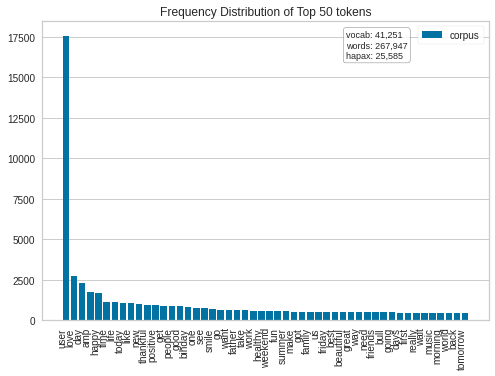

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from yellowbrick.text import FreqDistVisualizer
features=c_v.get_feature_names_out()
fig=plt.figure()
plt.title('barplot')
vis=FreqDistVisualizer(features=features,orient='v')
vis.fit_transform_show(BW)

To find the location and datatype of the data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
data.iloc[:,0].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Plot a bar graph using the counterplot method

Text(0.5, 1.0, '+ve & -ve sentiments')

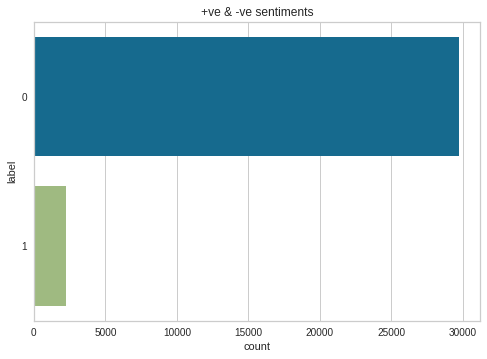

In [ ]:
sns.countplot(y=data.iloc[:,0]).set_title('+ve & -ve sentiments')

Tokenize the documents and fit the data into array

In [ ]:
vect=TfidfVectorizer(lowercase = True, tokenizer = None, analyzer = 'word', strip_accents='ascii',stop_words=stop_words,token_pattern='\w+',sublinear_tf=True)
vec_word = vect.fit_transform(np.array((data.tweet).ravel()))

Vectorize the vocabulary

In [ ]:
vect.vocabulary_

{'user': 38421,
 'father': 13319,
 'dysfunctional': 11694,
 'selfish': 32359,
 'drags': 11377,
 'kids': 20473,
 'dysfunction': 11693,
 'run': 31492,
 'thanks': 36239,
 'lyft': 22514,
 'credit': 9311,
 'use': 38411,
 'cause': 7201,
 'offer': 26445,
 'wheelchair': 39770,
 'vans': 38564,
 'pdx': 27637,
 'disapointed': 10796,
 'getthanked': 15324,
 'bihday': 5052,
 'majesty': 22721,
 'model': 24086,
 'love': 22169,
 'u': 37921,
 'take': 35671,
 'time': 36824,
 'ur': 38370,
 'factsguide': 13080,
 'society': 33742,
 'motivation': 24390,
 '2': 430,
 'huge': 17898,
 'fan': 13197,
 'fare': 13230,
 'big': 4991,
 'talking': 35710,
 'leave': 21229,
 'chaos': 7460,
 'pay': 27580,
 'disputes': 10914,
 'get': 15292,
 'allshowandnogo': 2372,
 'camping': 6810,
 'tomorrow': 37050,
 'dannya': 9871,
 'next': 25524,
 'school': 32033,
 'year': 40749,
 'exams': 12772,
 'think': 36592,
 'hate': 16860,
 'imagine': 18448,
 'actorslife': 1676,
 'revolutionschool': 30909,
 'girl': 15444,
 'land': 20960,
 'allin':

Plot the graph using frequency distribution visualizer

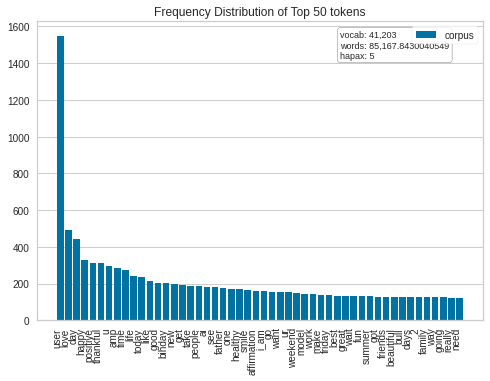

<31962x41203 sparse matrix of type '<class 'numpy.float64'>'
	with 256845 stored elements in Compressed Sparse Row format>

In [ ]:
feature = vect.get_feature_names_out()
picture=plt.figure()
plt.title('bar plot of TFIDF')
vis=FreqDistVisualizer(features=feature,orient='v')
vis.fit_transform_show(vec_word)

# model

Import libraries required for kernal

In [ ]:
from numpy import loadtxt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils  

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint


Tokenize the words using train_test_split function

In [ ]:
tokens= Tokenizer(num_words=2000)
encoding = preprocessing.LabelEncoder()
x = tokens.texts_to_matrix(data.clean_words_1)
y = encoding.fit_transform(data.label.values)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,stratify=y)

Define the keras model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               1000500   
                                                                 
 dense_4 (Dense)             (None, 5)                 2505      
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
Total params: 1,003,035
Trainable params: 1,003,035
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
45/45 [==============================] - 2s 36ms/step - loss: 1.9287 - acc: 0.0000e+00 - val_loss: 1.7973 - val_acc: 0.0000e+00
Epoch 2/20
45/45 [==============================] - 2s 42ms/step - loss: 1.6815 - acc: 0.0000e+00 - val_loss: 1.5637 - val_acc: 0.0000e+00
Epoch 3/20
45/45 [=======

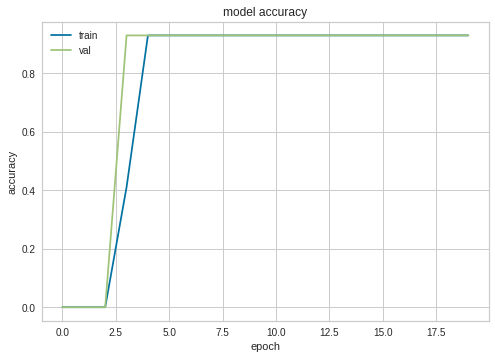

In [ ]:
mod = Sequential()
mod.add(layers.Dense(500, input_dim= 2000, activation='relu'))
mod.add(layers.Dense(5, activation= 'sigmoid'))
mod.add(layers.Dense(5, activation= 'softmax'))
mod.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics=['acc'])#compile the keras model

print(mod.summary())

history = mod.fit(x_train, y_train, epochs=20, verbose=True, validation_data=(x_test, y_test), batch_size=500)#fit the keras model on the data set
#plot the accuracy of the model
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy') 
plt.legend(['train','val'],loc ='upper left')
plt.show()

Evaluate the keras model

In [ ]:
scores=mod.evaluate(x_test,y_test,verbose=1)
print('Accuracy of model:%.2f%%'%(scores[1]*100))

300/300 [==============================] - 1s 2ms/step - loss: 0.3323 - acc: 0.9298
Accuracy of model:92.98%
